In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# !pip install scikit-learn

In [3]:
from sklearn.datasets import make_regression

In [7]:
X, y = make_regression(n_samples = 500, n_features=1, bias = 4.2, noise = 12)

In [8]:
print(X.shape)
print(y.shape)

(500, 1)
(500,)


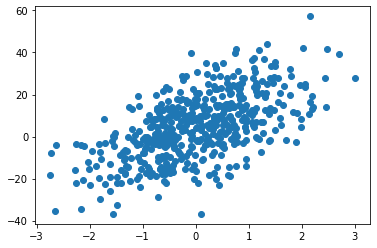

In [9]:
plt.scatter(X,y)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [12]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(375, 1) (375,)
(125, 1) (125,)


In [65]:
def hypothesis(x, W):
    x0 = 1
    x1 = x[0]
    h = W[0]*x0 + W[1]*x1
    return h

In [66]:
def error(X, W, y):
    err = 0.0
    m = X.shape[0]
    for i in range(m):
        h = hypothesis(X[i], W)
        err += (h - y[i])**2
    err /= 2*m
    return err

In [67]:
def gradient_descent(X, W, y, learning_rate = 0.1):
    m = X.shape[0]
    grad0 = 0.0
    grad1 = 0.0
    for i in range(m):
        grad1 += (y[i] - hypothesis(X[i], W))*X[i]
        grad0 += (y[i] - hypothesis(X[i], W))*1 # for x0
    grad1 /= m
    grad0 /= m
    W[1] = W[1] + learning_rate*grad1
    W[0] = W[0] + learning_rate*grad0
    err = error(X, W, y)
    return W, err

In [68]:
W = np.array([0.5, 0.5])
error_list = []
for i in range(400):
    W, err = gradient_descent(xtrain, W, ytrain)
    error_list.append(err)
print(W)

[ 4.29097844 68.73887443]


In [69]:
# error_list

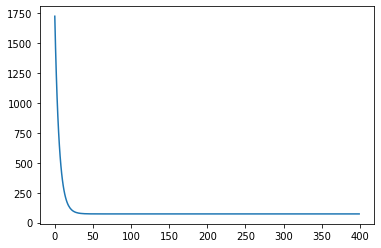

In [70]:
plt.plot(error_list)
plt.show()

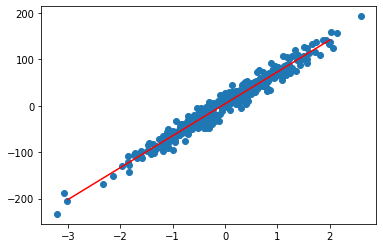

In [71]:
plt.scatter(xtrain, ytrain)

X = np.arange(-3,3)
Y = W[0] + W[1]*X
plt.plot(X, Y, c = 'r')

plt.show()

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression?

In [74]:
lr = LinearRegression()

In [92]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [93]:
lr.intercept_

4.870821629094264

In [94]:
y_pred = lr.predict([xtest[0]])

In [95]:
lr.score(xtest, ytest)

0.9919203417816185

In [86]:
y_pred

array([106.87781649])

In [14]:
from sklearn.linear_model import Lasso

In [15]:
ls = Lasso()

In [16]:
ls.fit(xtrain, ytrain)

Lasso()